# Mini Project Topic : Satellite Telemetry Anomaly Detection
### Dataset Link : https://zenodo.org/records/12588359

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../Downloads/dataset.csv')

In [5]:
df

,segment,anomaly,train,channel,sampling,duration,len,mean,var,std,...,smooth10_n_peaks,smooth20_n_peaks,diff_peaks,diff2_peaks,diff_var,diff2_var,gaps_squared,len_weighted,var_div_duration,var_div_len
0,1,1,1,CADC0872,1,279,280,8.533143e-07,3.494283e-10,0.000019,...,3,2,4,6,1.271176e-10,2.960666e-10,309,280,1.252431e-12,1.247958e-12
1,2,1,1,CADC0872,1,476,477,-3.639396e-06,6.476485e-10,0.000025,...,1,1,5,8,1.489383e-12,3.004752e-12,644,477,1.360606e-12,1.357754e-12
2,3,1,1,CADC0872,1,594,595,1.170788e-05,5.592877e-10,0.000024,...,2,2,2,3,4.112280e-12,1.029918e-11,772,595,9.415618e-13,9.399794e-13
3,4,1,1,CADC0872,1,271,272,8.486808e-07,5.466024e-10,0.000023,...,2,2,3,6,2.475760e-11,6.240985e-11,339,272,2.016983e-12,2.009568e-12
4,5,0,0,CADC0872,1,255,257,1.058485e-05,5.279023e-10,0.000023,...,1,1,78,87,5.547101e-13,7.035422e-13,357,257,2.070205e-12,2.054094e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,2119,0,0,CADC0872,5,155,32,-2.638445e-05,1.365061e-10,0.000012,...,1,1,4,7,5.643170e-12,9.612178e-13,775,160,8.806842e-13,4.265814e-12
2119,2120,0,1,CADC0872,5,165,34,-2.318618e-05,1.988522e-10,0.000014,...,1,1,4,9,7.349826e-12,1.162888e-12,825,170,1.205165e-12,5.848595e-12
2120,2121,0,1,CADC0872,5,140,29,-3.137510e-05,1.146533e-10,0.000011,...,1,1,3,7,5.763149e-12,9.522562e-13,700,145,8.189522e-13,3.953562e-12
2121,2122,0,1,CADC0872,5,200,41,-5.376693e-06,7.755461e-10,0.000028,...,1,1,2,12,1.837184e-11,1.123874e-12,1000,205,3.877731e-12,1.891576e-11


# Data Preprocessing

In [8]:
df = df.drop(columns=['segment'])

In [10]:
df

,anomaly,train,channel,sampling,duration,len,mean,var,std,kurtosis,...,smooth10_n_peaks,smooth20_n_peaks,diff_peaks,diff2_peaks,diff_var,diff2_var,gaps_squared,len_weighted,var_div_duration,var_div_len
0,1,1,CADC0872,1,279,280,8.533143e-07,3.494283e-10,0.000019,0.631117,...,3,2,4,6,1.271176e-10,2.960666e-10,309,280,1.252431e-12,1.247958e-12
1,1,1,CADC0872,1,476,477,-3.639396e-06,6.476485e-10,0.000025,-1.243611,...,1,1,5,8,1.489383e-12,3.004752e-12,644,477,1.360606e-12,1.357754e-12
2,1,1,CADC0872,1,594,595,1.170788e-05,5.592877e-10,0.000024,-0.284593,...,2,2,2,3,4.112280e-12,1.029918e-11,772,595,9.415618e-13,9.399794e-13
3,1,1,CADC0872,1,271,272,8.486808e-07,5.466024e-10,0.000023,-0.887088,...,2,2,3,6,2.475760e-11,6.240985e-11,339,272,2.016983e-12,2.009568e-12
4,0,0,CADC0872,1,255,257,1.058485e-05,5.279023e-10,0.000023,-1.484393,...,1,1,78,87,5.547101e-13,7.035422e-13,357,257,2.070205e-12,2.054094e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,0,0,CADC0872,5,155,32,-2.638445e-05,1.365061e-10,0.000012,-1.465830,...,1,1,4,7,5.643170e-12,9.612178e-13,775,160,8.806842e-13,4.265814e-12
2119,0,1,CADC0872,5,165,34,-2.318618e-05,1.988522e-10,0.000014,-1.490978,...,1,1,4,9,7.349826e-12,1.162888e-12,825,170,1.205165e-12,5.848595e-12
2120,0,1,CADC0872,5,140,29,-3.137510e-05,1.146533e-10,0.000011,-1.504177,...,1,1,3,7,5.763149e-12,9.522562e-13,700,145,8.189522e-13,3.953562e-12
2121,0,1,CADC0872,5,200,41,-5.376693e-06,7.755461e-10,0.000028,-1.470041,...,1,1,2,12,1.837184e-11,1.123874e-12,1000,205,3.877731e-12,1.891576e-11


In [12]:
df.isnull().sum()

anomaly             0
train               0
channel             0
sampling            0
duration            0
len                 0
mean                0
var                 0
std                 0
kurtosis            0
skew                0
n_peaks             0
smooth10_n_peaks    0
smooth20_n_peaks    0
diff_peaks          0
diff2_peaks         0
diff_var            0
diff2_var           0
gaps_squared        0
len_weighted        0
var_div_duration    0
var_div_len         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anomaly           2123 non-null   int64  
 1   train             2123 non-null   int64  
 2   channel           2123 non-null   object 
 3   sampling          2123 non-null   int64  
 4   duration          2123 non-null   int64  
 5   len               2123 non-null   int64  
 6   mean              2123 non-null   float64
 7   var               2123 non-null   float64
 8   std               2123 non-null   float64
 9   kurtosis          2123 non-null   float64
 10  skew              2123 non-null   float64
 11  n_peaks           2123 non-null   int64  
 12  smooth10_n_peaks  2123 non-null   int64  
 13  smooth20_n_peaks  2123 non-null   int64  
 14  diff_peaks        2123 non-null   int64  
 15  diff2_peaks       2123 non-null   int64  
 16  diff_var          2123 non-null   float64


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [20]:
df['channel'] = le.fit_transform(df['channel'])

In [22]:
df.dtypes

anomaly               int64
train                 int64
channel               int32
sampling              int64
duration              int64
len                   int64
mean                float64
var                 float64
std                 float64
kurtosis            float64
skew                float64
n_peaks               int64
smooth10_n_peaks      int64
smooth20_n_peaks      int64
diff_peaks            int64
diff2_peaks           int64
diff_var            float64
diff2_var           float64
gaps_squared          int64
len_weighted          int64
var_div_duration    float64
var_div_len         float64
dtype: object

# Z-SCORE Method to remove outliers

In [25]:
from scipy.stats import zscore
import numpy as np
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df_clean_zscore = df[(z_scores < 3).all(axis=1)]


In [27]:
df_clean_zscore 

,anomaly,train,channel,sampling,duration,len,mean,var,std,kurtosis,...,smooth10_n_peaks,smooth20_n_peaks,diff_peaks,diff2_peaks,diff_var,diff2_var,gaps_squared,len_weighted,var_div_duration,var_div_len
1,1,1,0,1,476,477,-3.639396e-06,6.476485e-10,0.000025,-1.243611,...,1,1,5,8,1.489383e-12,3.004752e-12,644,477,1.360606e-12,1.357754e-12
2,1,1,0,1,594,595,1.170788e-05,5.592877e-10,0.000024,-0.284593,...,2,2,2,3,4.112280e-12,1.029918e-11,772,595,9.415618e-13,9.399794e-13
3,1,1,0,1,271,272,8.486808e-07,5.466024e-10,0.000023,-0.887088,...,2,2,3,6,2.475760e-11,6.240985e-11,339,272,2.016983e-12,2.009568e-12
4,0,0,0,1,255,257,1.058485e-05,5.279023e-10,0.000023,-1.484393,...,1,1,78,87,5.547101e-13,7.035422e-13,357,257,2.070205e-12,2.054094e-12
5,0,1,0,1,252,253,6.326025e-06,6.643180e-10,0.000026,-1.302309,...,1,1,66,84,6.430575e-13,7.268033e-13,350,253,2.636182e-12,2.625763e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,0,0,0,5,155,32,-2.638445e-05,1.365061e-10,0.000012,-1.465830,...,1,1,4,7,5.643170e-12,9.612178e-13,775,160,8.806842e-13,4.265814e-12
2119,0,1,0,5,165,34,-2.318618e-05,1.988522e-10,0.000014,-1.490978,...,1,1,4,9,7.349826e-12,1.162888e-12,825,170,1.205165e-12,5.848595e-12
2120,0,1,0,5,140,29,-3.137510e-05,1.146533e-10,0.000011,-1.504177,...,1,1,3,7,5.763149e-12,9.522562e-13,700,145,8.189522e-13,3.953562e-12
2121,0,1,0,5,200,41,-5.376693e-06,7.755461e-10,0.000028,-1.470041,...,1,1,2,12,1.837184e-11,1.123874e-12,1000,205,3.877731e-12,1.891576e-11


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = df.select_dtypes(include='number')

In [31]:
corr_matrix = numeric_data.corr()

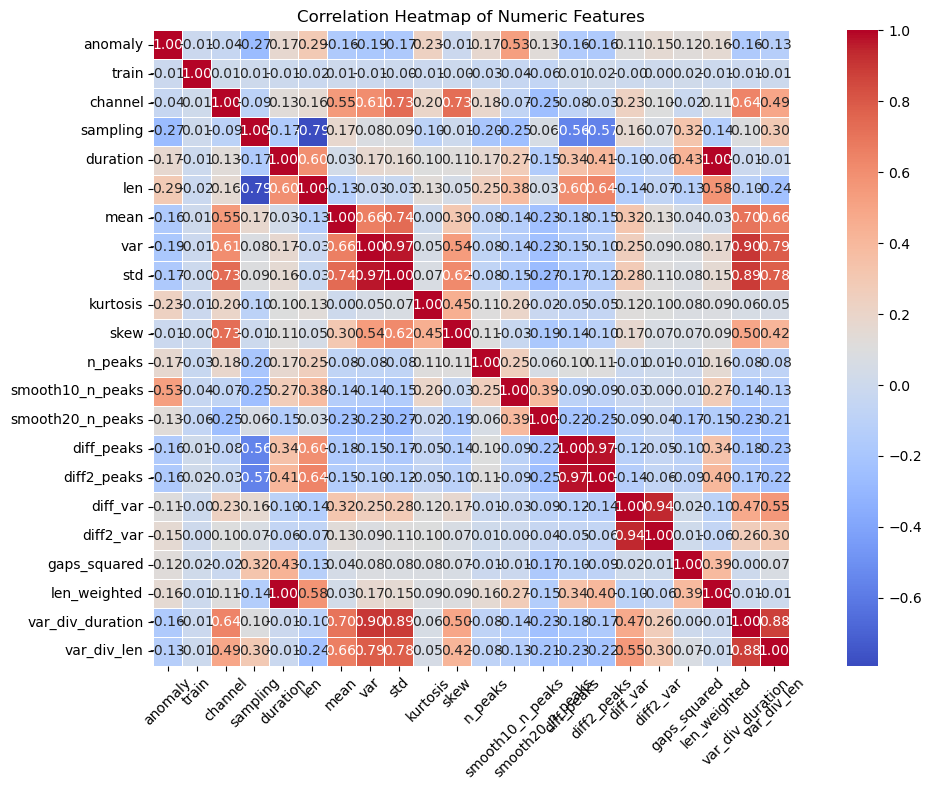

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [34]:
x = df.drop('anomaly', axis=1)
x

,train,channel,sampling,duration,len,mean,var,std,kurtosis,skew,...,smooth10_n_peaks,smooth20_n_peaks,diff_peaks,diff2_peaks,diff_var,diff2_var,gaps_squared,len_weighted,var_div_duration,var_div_len
0,1,0,1,279,280,8.533143e-07,3.494283e-10,0.000019,0.631117,0.552052,...,3,2,4,6,1.271176e-10,2.960666e-10,309,280,1.252431e-12,1.247958e-12
1,1,0,1,476,477,-3.639396e-06,6.476485e-10,0.000025,-1.243611,0.425632,...,1,1,5,8,1.489383e-12,3.004752e-12,644,477,1.360606e-12,1.357754e-12
2,1,0,1,594,595,1.170788e-05,5.592877e-10,0.000024,-0.284593,-0.826187,...,2,2,2,3,4.112280e-12,1.029918e-11,772,595,9.415618e-13,9.399794e-13
3,1,0,1,271,272,8.486808e-07,5.466024e-10,0.000023,-0.887088,-0.138498,...,2,2,3,6,2.475760e-11,6.240985e-11,339,272,2.016983e-12,2.009568e-12
4,0,0,1,255,257,1.058485e-05,5.279023e-10,0.000023,-1.484393,-0.060155,...,1,1,78,87,5.547101e-13,7.035422e-13,357,257,2.070205e-12,2.054094e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,0,0,5,155,32,-2.638445e-05,1.365061e-10,0.000012,-1.465830,-0.023716,...,1,1,4,7,5.643170e-12,9.612178e-13,775,160,8.806842e-13,4.265814e-12
2119,1,0,5,165,34,-2.318618e-05,1.988522e-10,0.000014,-1.490978,-0.038516,...,1,1,4,9,7.349826e-12,1.162888e-12,825,170,1.205165e-12,5.848595e-12
2120,1,0,5,140,29,-3.137510e-05,1.146533e-10,0.000011,-1.504177,0.013923,...,1,1,3,7,5.763149e-12,9.522562e-13,700,145,8.189522e-13,3.953562e-12
2121,1,0,5,200,41,-5.376693e-06,7.755461e-10,0.000028,-1.470041,-0.002828,...,1,1,2,12,1.837184e-11,1.123874e-12,1000,205,3.877731e-12,1.891576e-11


In [35]:
y = df['anomaly']
y

0       1
1       1
2       1
3       1
4       0
       ..
2118    0
2119    0
2120    0
2121    0
2122    1
Name: anomaly, Length: 2123, dtype: int64

# Random Forest Classifier

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [176]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [178]:
model = RandomForestClassifier(random_state=42)

In [180]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [191]:
y_pred_rf = model.predict(X_test)

In [193]:
y_pred_rf

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [197]:
 acc_rf=accuracy_score(y_test, y_pred_rf)
print("Accuracy Of Random Forest Classifier : ",acc_rf)

Accuracy Of Random Forest Classifier :  0.96


In [224]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       337
           1       0.96      0.84      0.90        88

    accuracy                           0.96       425
   macro avg       0.96      0.92      0.94       425
weighted avg       0.96      0.96      0.96       425



In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [372]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[334,   3],
       [ 14,  74]], dtype=int64)

In [374]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model.classes_)
disp

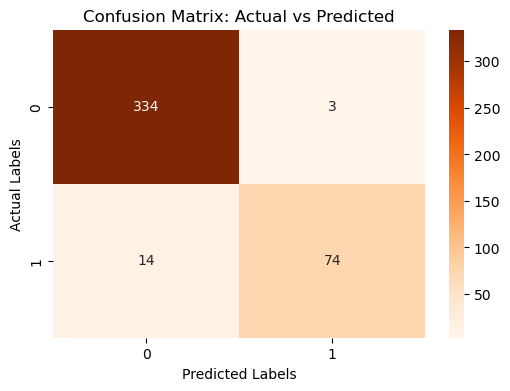

In [376]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix: Actual vs Predicted')
plt.show()

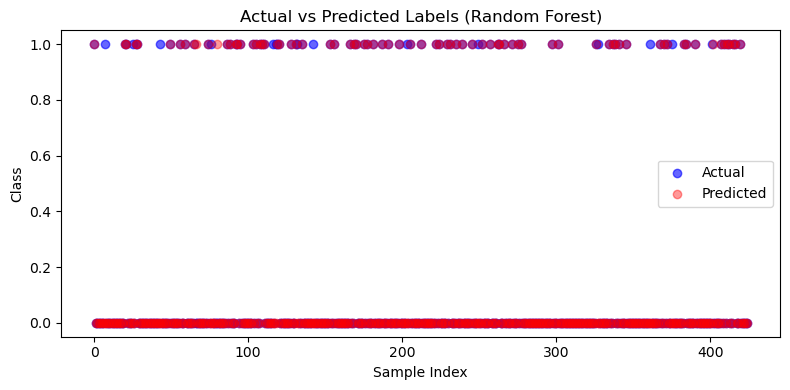

In [247]:
# Scatter plot for actual vs predicted
plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='red', label='Predicted', alpha=0.4)
plt.legend()
plt.title('Actual vs Predicted Labels (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.tight_layout()
plt.show()

In [251]:
correct = cm[0][0] + cm[1][1]  # True Neg + True Pos
incorrect = cm[0][1] + cm[1][0]  # False Pos + False Neg

In [253]:
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [correct, incorrect]
colors = ['#8fd9b6', '#ff9999']

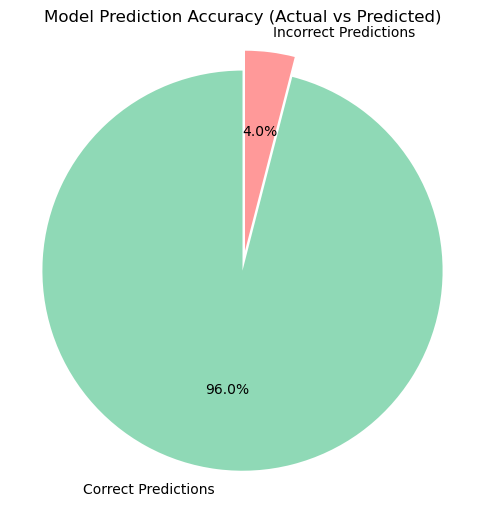

In [420]:
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0.05))
plt.title('Model Prediction Accuracy (Actual vs Predicted)')
plt.axis('equal')  
plt.show()

In [257]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [259]:
y_probs = model.predict_proba(X_test)[:, 1]

In [261]:
mse = mean_squared_error(y_test, y_probs)

In [263]:
rmse = np.sqrt(mse)

In [265]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 0.0312
Root Mean Squared Error (RMSE): 0.1767


In [267]:
from sklearn.metrics import roc_curve, auc

In [269]:
y_probs = model.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

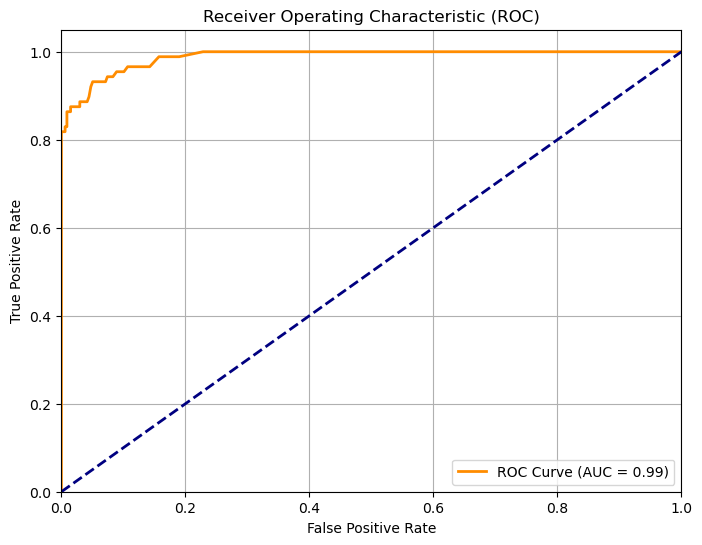

In [271]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# XGboost Model 

In [206]:
import xgboost as xgb

In [208]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss',
    random_state=42
)

In [210]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [212]:
y_pred_xg = xgb_model.predict(X_test)

In [214]:
y_pred_xg

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [340]:
print(" Accuracy:", accuracy_score(y_test, y_pred_xg))

 Accuracy: 0.9670588235294117


In [342]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       337
           1       1.00      0.84      0.91        88

    accuracy                           0.97       425
   macro avg       0.98      0.92      0.95       425
weighted avg       0.97      0.97      0.97       425



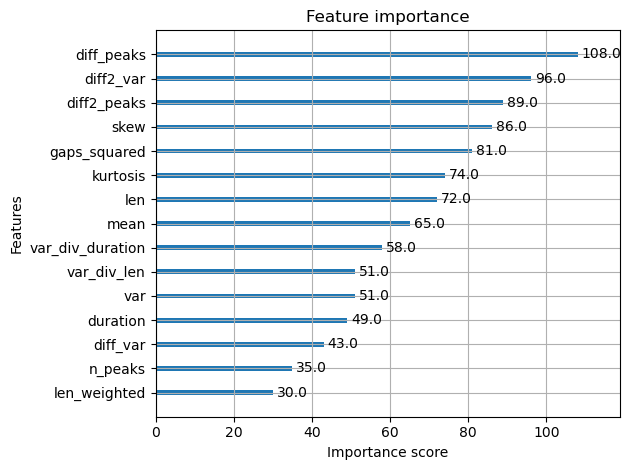

In [344]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model, max_num_features=15)
plt.tight_layout()
plt.show()

In [346]:
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb= auc(fpr, tpr)

In [348]:
roc_auc_xgb

0.9860736444564338

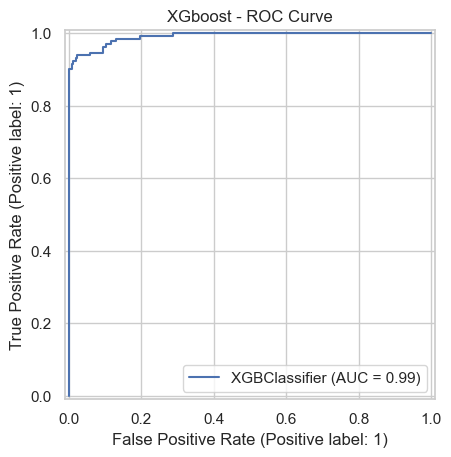

In [438]:
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("XGboost - ROC Curve")
plt.show()

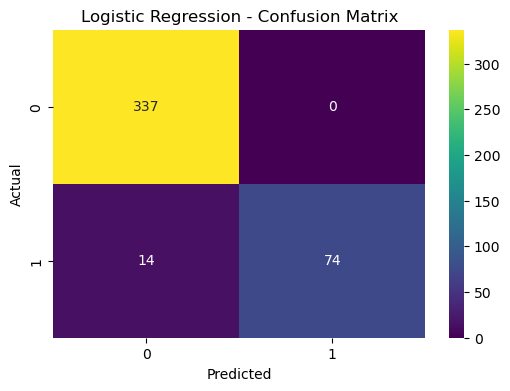

In [352]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xg), annot=True, fmt='d', cmap='viridis')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Logistic Regression

In [275]:
from sklearn.linear_model import LogisticRegression

In [281]:
model_lr = LogisticRegression()

In [283]:
model_lr.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [286]:
y_pred_lr = model_lr.predict(X_test)

In [288]:
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [292]:
acc_lr=accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression :", acc_lr)

Accuracy of Logistic Regression : 0.8752941176470588


In [290]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       337
           1       0.79      0.55      0.64        88

    accuracy                           0.88       425
   macro avg       0.84      0.75      0.78       425
weighted avg       0.87      0.88      0.87       425



In [320]:
y_probs_lr = model_lr.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr, tpr)

In [322]:
roc_auc_lr

0.8596574049096304

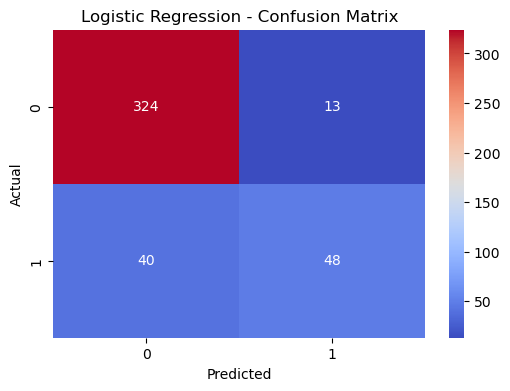

In [354]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='coolwarm')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


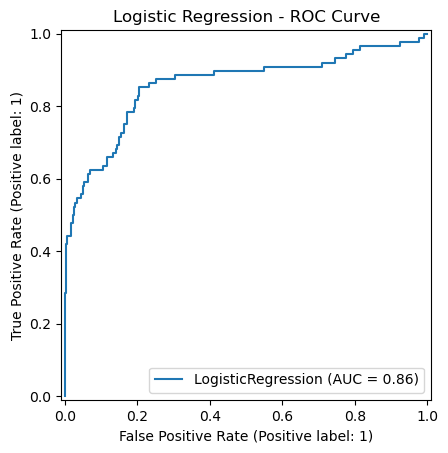

In [326]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model_lr, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()

# Support Vector Machine

In [308]:
from sklearn.svm import SVC

In [310]:
model_svc = SVC(probability=True)

In [312]:
model_svc.fit(X_train, y_train)

SVC(probability=True)

In [314]:
y_pred_svc = model_svc.predict(X_test)
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [316]:
acc_svc=accuracy_score(y_test, y_pred_svc)
print("Accuracy of Support Vector Machine :", acc_svc)

Accuracy of Support Vector Machine : 0.8117647058823529


In [318]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       337
           1       1.00      0.09      0.17        88

    accuracy                           0.81       425
   macro avg       0.90      0.55      0.53       425
weighted avg       0.85      0.81      0.74       425



In [328]:
y_probs_svc = model_svc.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs_svc)
roc_auc_lr = auc(fpr, tpr)

In [330]:
roc_auc_lr

0.8665362827083896

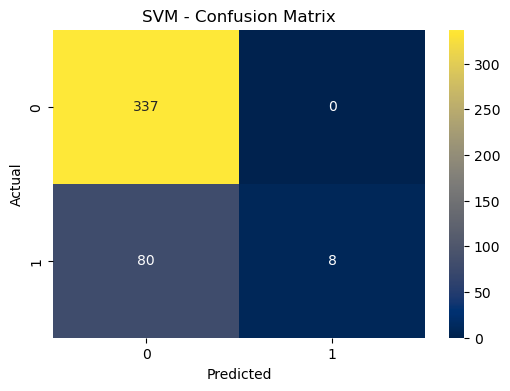

In [364]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='cividis')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

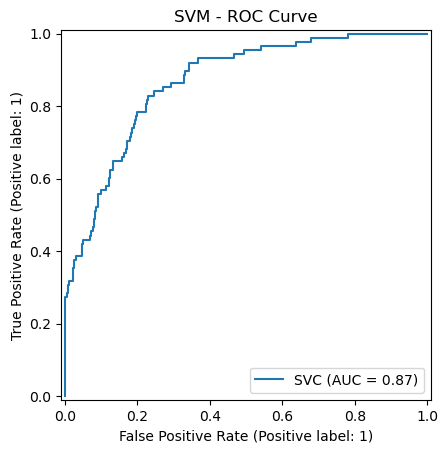

In [336]:
RocCurveDisplay.from_estimator(model_svc, X_test, y_test)
plt.title("SVM - ROC Curve")
plt.show()

# Decision Tree Classifier

In [382]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [384]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [386]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

In [388]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [394]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [402]:
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

In [404]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Accuracy: 0.945054945054945


In [406]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       506
           1       0.95      0.77      0.85       131

    accuracy                           0.95       637
   macro avg       0.95      0.88      0.91       637
weighted avg       0.95      0.95      0.94       637



In [410]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

roc_auc = roc_auc_score(y_test, y_proba_dt)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9447847207555141


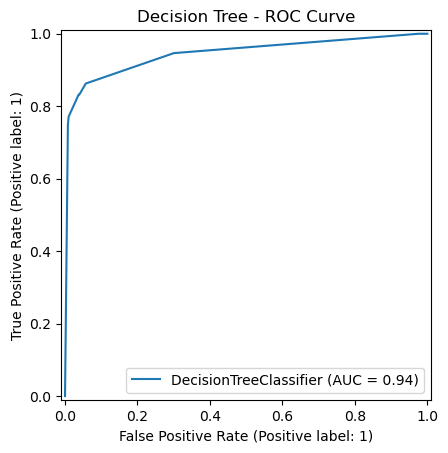

In [415]:
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("Decision Tree - ROC Curve")
plt.show()

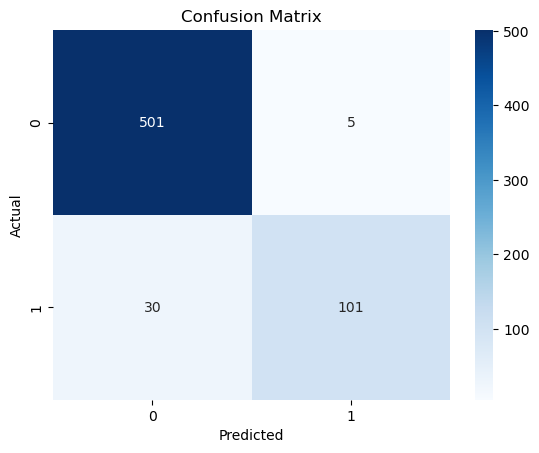

In [412]:
cm_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

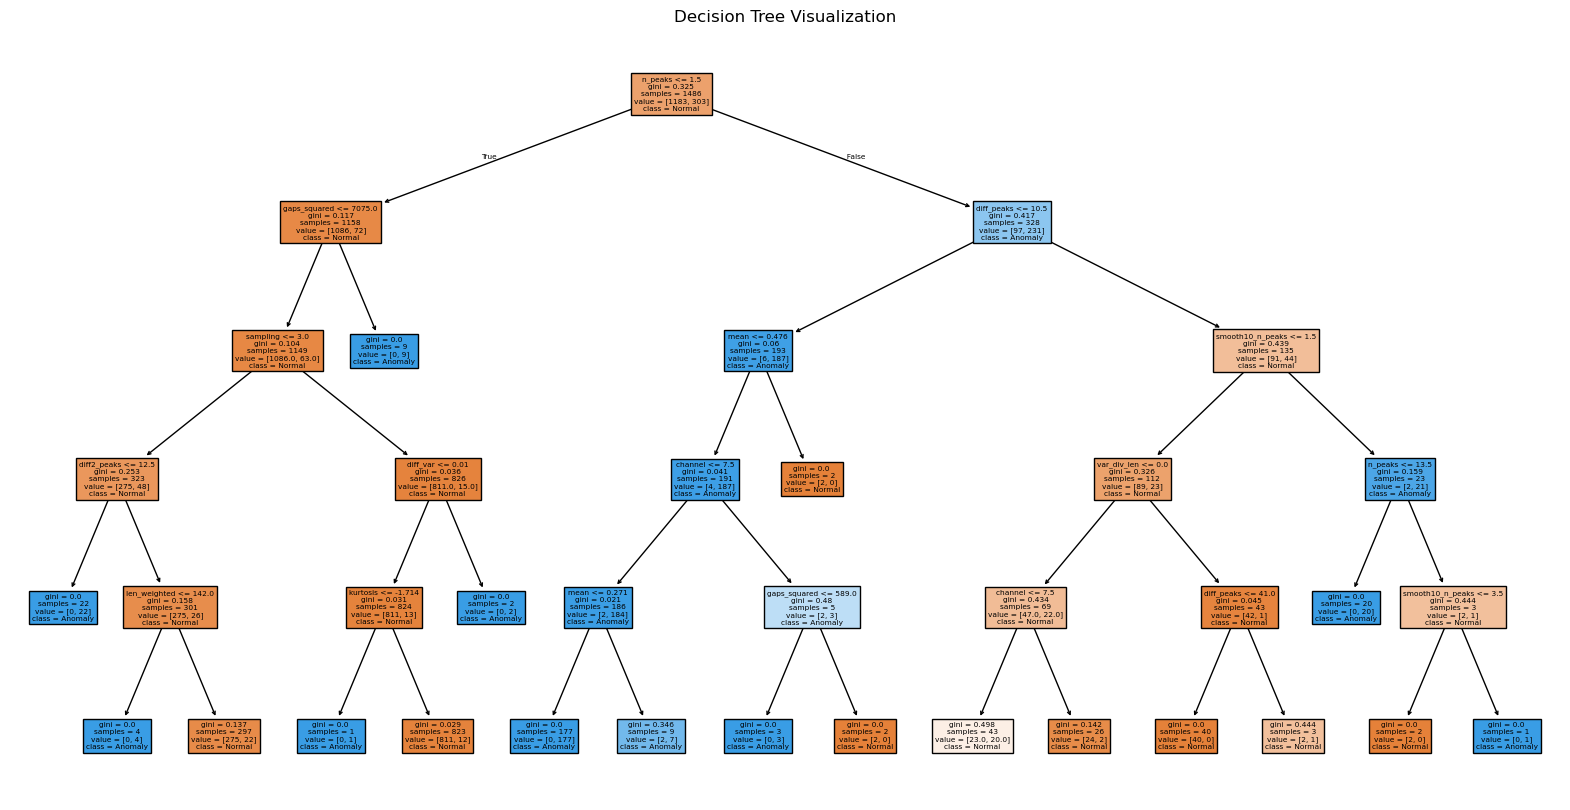

In [417]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=x.columns, class_names=['Normal', 'Anomaly'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


# Conclusion

In [422]:
import pandas as pd

model_accuracies = {
    'Random Forest': 0.96,
    'XGBoost': 0.96,
    'Decision Tree': 0.94,
    'Logistic Regression': 0.87,
    'SVM': 0.81,
}

accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)


,Model,Accuracy
0,Random Forest,0.96
1,XGBoost,0.96
2,Decision Tree,0.94
3,Logistic Regression,0.87
4,SVM,0.81


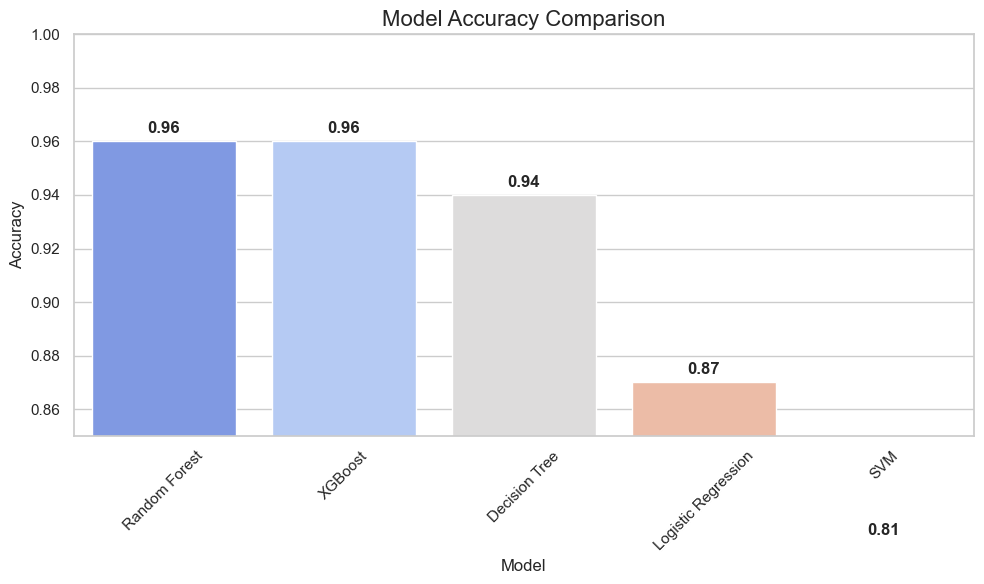

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot Accuracy for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='coolwarm', hue='Model', legend=False)

# Add numeric accuracy labels on top of bars
for i, v in enumerate(accuracy_df['Accuracy']):
    plt.text(i, v + 0.002, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')

plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.85, 1.00)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
